#### WEEK 1 DATE: 17 MARCH 2022
## Exercise 1

In [423]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 6. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.

In [424]:
def myFnLinReg(x,y):
    
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    b1_num = np.sum(np.multiply((x - x_mean),(y-y_mean)))
    b1_den = np.sum(np.multiply((x-x_mean),(x-x_mean)))
    b1 = b1_num/b1_den
    
    b0 = y_mean - (b1 * x_mean)
    
    return b0,b1

The regression line will be y = b0 + b1*x

#### 7. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (70 %,30%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.

In [425]:
#Importing the mtcars dataset
df = pd.read_csv("mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [426]:
from sklearn.model_selection import train_test_split
# Assigning the attribute 'wt' to x and 'mpg' to y
x = df['wt']
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
b0,b1 = myFnLinReg(X_train, y_train)

print("Regression line: y = {} + {}*x".format(b0,b1))

def LR_model(b0,b1):
    def reg(x):
        y = b0 + b1*x
        return y
    return reg

Regression line: y = 37.0438956114062 + -5.3561465169200275*x


#### 8. What is the mpg of a car, whose weight is 6.7?

In [427]:
mpg_model = LR_model(b0,b1)
mpg_model(6.7)

1.1577139480420158

#### 9. Compute and print accuracy measures such as RMSE and R2 for the test set.

In [428]:
def RMSE(y_pred, y_test):
    return np.sqrt(((y_pred - y_test) ** 2).mean())
y_pred = mpg_model(X_test)

RMSE(y_pred,y_test)

3.014827410902745

The RMSE value obtained is 3.014

In [429]:
def R_square(y_test, y_pred):
    size = np.size(y_test)
    sum_x = np.sum(y_test)
    sum_y = np.sum(y_pred)
    sum_x2 = np.sum(np.square(y_test))
    sum_y2 = np.sum(np.square(y_pred))
    sum_xy = np.sum(np.multiply(y_test,y_pred))

    r2 = ((size*sum_xy)-(sum_x*sum_y))/pow((((size*sum_x2)-(sum_x*sum_x))*((size*sum_y2)-(sum_y*sum_y))),0.5)
    return r2
R_square(y_test, y_pred)

0.8694734993067855

The R-square value obtained is 0.869 indicating that our model is almost 87% accurate

### Using sklearn library:

In [430]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

3.014827410902745

In [431]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6446089874551474

## Exercise 2

#### 4. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.

In [432]:
df1 = pd.read_csv("boston.csv")
df1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:>

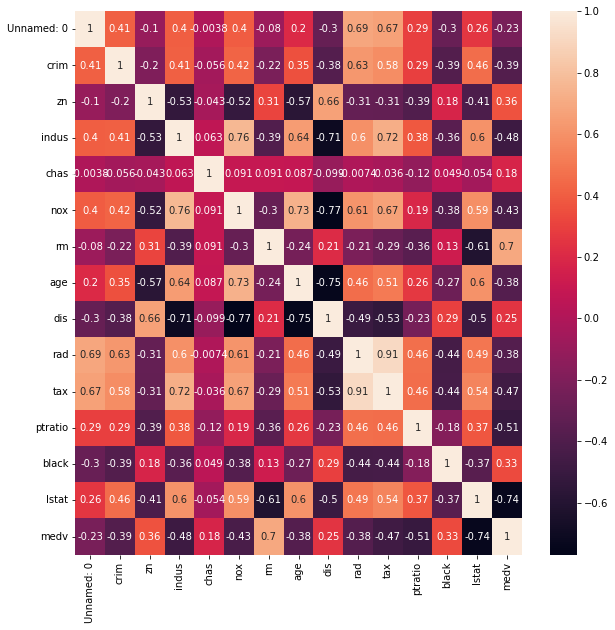

In [448]:
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In the above heatmap, we can find the correletion values between different attributes, and the 5 best features to predict 'MEDV' can be rm, Istat, indus, ptratiio